https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

# **Importing the Libraries**

In [ ]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# **Getting the Data**

In [ ]:
test_df  = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

test_sub_df = pd.read_csv("test_sub.csv")

# **Data Exploration/Analysis**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             2805 non-null   object
 1   Income             2805 non-null   int64 
 2   Education          2802 non-null   object
 3   Dependents         2805 non-null   int64 
 4   Marital Status     2805 non-null   object
 5   Employment Status  2805 non-null   object
 6   Mortgage           2805 non-null   object
 7   Resident           2804 non-null   object
 8   Credit             2804 non-null   object
 9   Risk Status        2805 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 219.3+ KB


In [ ]:
train_df.describe()

,Income,Dependents,Risk Status
count,2805.000000,2805.000000,2805.00000
mean,56679.145811,1.059893,2.85098
std,31457.184954,0.890579,0.75343
min,1.000000,0.000000,1.00000
25%,32000.000000,0.000000,2.00000
50%,50000.000000,1.000000,3.00000
75%,74000.000000,2.000000,3.00000
max,200000.000000,5.000000,5.00000


In [ ]:
train_df.head(8)

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
0,Male,28000,Others,0,Divorced,Retired,Yes,Semi-urban,No,4
1,Female,42000,Bachelor,2,Separated,Self-employed,No,Urban,No,3
2,Male,52000,Bachelor,0,Divorced,Others,Yes,Urban,No,3
3,Male,64000,Master,1,Single,Others,Yes,Urban,No,3
4,Female,126000,Master,1,Divorced,Self-employed,No,Urban,Yes,2
5,Female,49000,Doctorate,2,Separated,Others,Yes,Urban,No,3
6,Male,93000,Master,1,Single,Others,Yes,Semi-urban,Yes,3
7,Female,112000,Bachelor,0,Divorced,Self-employed,Yes,Rural,Yes,2


In [ ]:
total        = train_df.isnull().sum().sort_values(ascending=False)
percent_1    = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2    = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Education,3,0.1
Credit,1,0.0
Resident,1,0.0
Risk Status,0,0.0
Mortgage,0,0.0


In [ ]:
train_df.columns.values

array(['Gender', 'Income', 'Education', 'Dependents', 'Marital Status',
       'Employment Status', 'Mortgage', 'Resident', 'Credit',
       'Risk Status'], dtype=object)

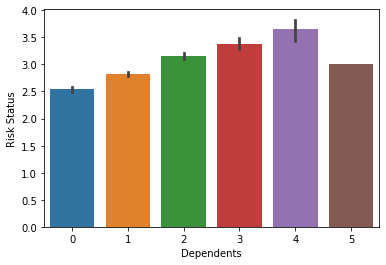

In [ ]:
sns.barplot(x='Dependents', y='Risk Status', data=train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


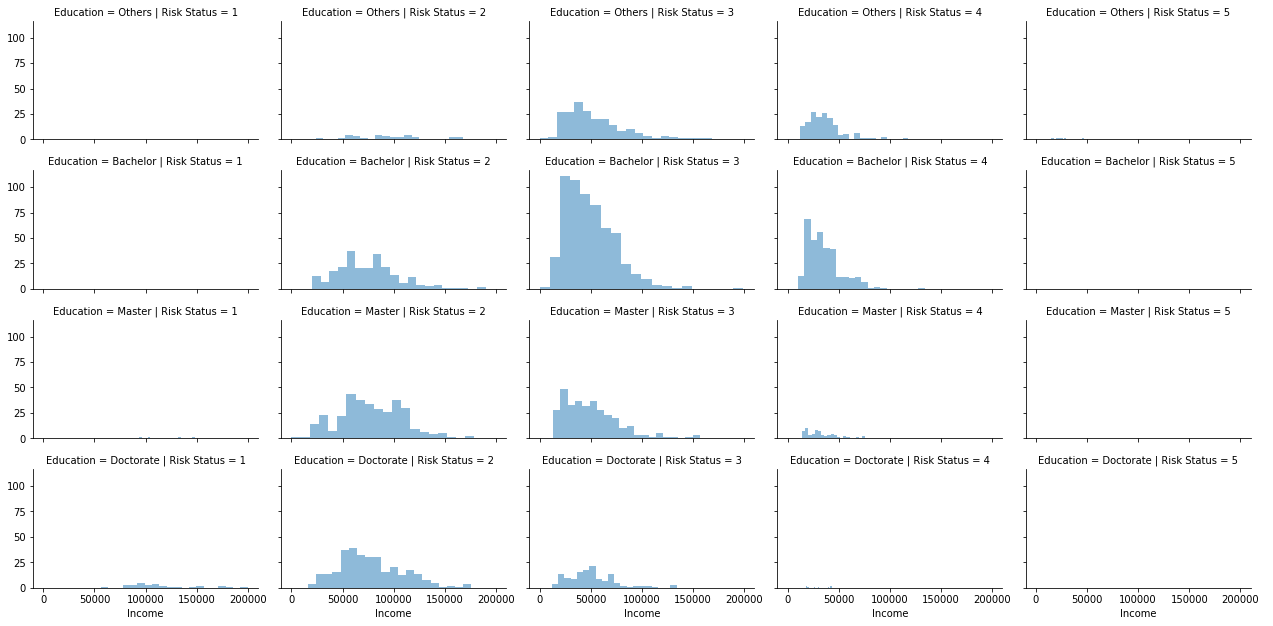

In [ ]:
grid = sns.FacetGrid(train_df, col='Risk Status', row='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Income', alpha=.5, bins=20)
grid.add_legend();

# **Data Preprocessing**

In [ ]:
train_df = train_df.drop(['Gender'], axis=1)
train_df = train_df.drop(['Marital Status'], axis=1)
train_df = train_df.drop(['Resident'], axis=1)

In [ ]:
train_df['Education'].describe()

count         2802
unique           4
top       Bachelor
freq          1170
Name: Education, dtype: object

In [ ]:
common_value = 'Bachelor'
data = [train_df, test_df]

for dataset in data:
    dataset['Education'] = dataset['Education'].fillna(common_value)

In [ ]:
train_df['Credit'].describe()

count     2804
unique       2
top        Yes
freq      1745
Name: Credit, dtype: object

In [ ]:
common_value = 'Yes'
data = [train_df, test_df]

for dataset in data:
    dataset['Credit'] = dataset['Credit'].fillna(common_value)

# **Qcut Income**

In [ ]:
#train_df['Income_cut'] = pd.qcut(train_df.Income, q=6)

In [ ]:
#train_df['Income_cut'].value_counts().plot(kind='barh')
#plt.show()
#plt.legend

In [ ]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Income'] <= 26000, 'Income'] = 0
    dataset.loc[(dataset['Income'] > 26000) & (dataset['Income'] <= 38000), 'Income']  = 1
    dataset.loc[(dataset['Income'] > 38000) & (dataset['Income'] <= 50000), 'Income']  = 2
    dataset.loc[(dataset['Income'] > 50000) & (dataset['Income'] <= 65000), 'Income']  = 3
    dataset.loc[(dataset['Income'] > 65000) & (dataset['Income'] <= 86000), 'Income']  = 4
    dataset.loc[ dataset['Income'] > 86000, 'Income'] = 5
    

# **Convert to numeric number**

In [ ]:
credit = {"No": 0, "Yes": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Credit'] = dataset['Credit'].map(credit)

In [ ]:
mortgage = {"No": 0, "Yes": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Mortgage'] = dataset['Mortgage'].map(mortgage)

In [ ]:
education = {"Doctorate": 0, "Master": 1, "Bachelor": 2,"Others":3}
data = [train_df, test_df]

for dataset in data:
    dataset['Education'] = dataset['Education'].map(education)
    dataset['Education'] = dataset['Education'].astype(int)

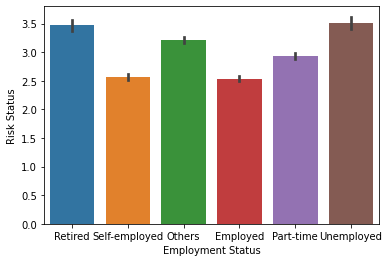

In [ ]:
sns.barplot(x='Employment Status', y='Risk Status', data=train_df)

In [ ]:
employment = {"Employed": 0, "Self-employed": 1, "Part-time": 2,"Others":3,"Retired":4,"Unemployed":5}
data = [train_df, test_df]

for dataset in data:
    dataset['Employment Status'] = dataset['Employment Status'].map(employment)
    dataset['Employment Status'] = dataset['Employment Status'].astype(int)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Income             2805 non-null   int64
 1   Education          2805 non-null   int64
 2   Dependents         2805 non-null   int64
 3   Employment Status  2805 non-null   int64
 4   Mortgage           2805 non-null   int64
 5   Credit             2805 non-null   int64
 6   Risk Status        2805 non-null   int64
dtypes: int64(7)
memory usage: 153.5 KB


In [ ]:
train_df.head(10)

,Income,Education,Dependents,Employment Status,Mortgage,Credit,Risk Status
0,1,3,0,4,1,0,4
1,2,2,2,1,0,0,3
2,3,2,0,3,1,0,3
3,3,1,1,3,1,0,3
4,5,1,1,1,0,1,2
5,2,0,2,3,1,0,3
6,5,1,1,3,1,1,3
7,5,2,0,1,1,1,2
8,3,2,0,0,1,0,2
9,2,3,0,3,1,1,4


# **Building Machine Learning Models**

In [ ]:
X_train = train_df.drop("Risk Status", axis=1)
Y_train = train_df["Risk Status"]

In [ ]:
X_test = test_df.drop(['Gender','Marital Status','Resident'], axis=1)

In [ ]:
test_labels  = X_test.pop('Risk Status')

In [ ]:
test_labels

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
345   NaN
346   NaN
347   NaN
348   NaN
349   NaN
Name: Risk Status, Length: 350, dtype: float64

In [ ]:
X_train.head(10)

,Income,Education,Dependents,Employment Status,Mortgage,Credit
0,1,3,0,4,1,0
1,2,2,2,1,0,0
2,3,2,0,3,1,0
3,3,1,1,3,1,0
4,5,1,1,1,0,1
5,2,0,2,3,1,0
6,5,1,1,3,1,1
7,5,2,0,1,1,1
8,3,2,0,0,1,0
9,2,3,0,3,1,1


In [ ]:
X_test.head(10)

,Income,Education,Dependents,Employment Status,Mortgage,Credit
0,3,2,1,3,1,0
1,2,1,2,0,1,1
2,0,3,2,2,1,0
3,1,3,1,3,1,0
4,5,0,1,0,0,1
5,3,0,1,0,1,0
6,0,2,0,1,1,1
7,1,2,1,4,0,1
8,1,2,1,3,1,1
9,1,3,1,5,0,0


# **Stochastic Gradient Descent (SGD)**

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [ ]:
acc_sgd

65.7

# **Random Forest**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [ ]:
acc_random_forest

89.3

In [ ]:
Y_prediction

array([3, 3, 4, 4, 2, 2, 3, 4, 4, 4, 4, 3, 3, 2, 4, 4, 3, 3, 4, 4, 3, 3,
       2, 3, 2, 2, 2, 3, 3, 3, 4, 3, 4, 2, 2, 3, 3, 4, 3, 4, 4, 3, 2, 2,
       3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 4, 4, 2, 3, 3, 2, 3,
       1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 4, 2, 2, 3, 2, 3, 3, 3,
       2, 3, 2, 3, 3, 3, 4, 3, 3, 2, 2, 2, 4, 3, 2, 4, 4, 4, 3, 4, 3, 4,
       3, 3, 4, 4, 3, 2, 2, 3, 2, 2, 4, 3, 3, 2, 4, 3, 4, 3, 3, 2, 4, 3,
       2, 3, 2, 4, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 3, 2, 3, 4, 3, 2, 2, 3, 2, 2, 4, 2, 2, 3, 4, 3, 3, 4,
       3, 4, 2, 3, 4, 4, 3, 4, 3, 2, 2, 3, 3, 3, 4, 2, 2, 4, 3, 3, 4, 3,
       2, 3, 3, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 1, 3, 3, 3, 3, 2, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 2, 4, 2, 4, 2, 3, 4, 2, 4, 4, 3, 4, 3, 4, 3,
       2, 4, 4, 2, 2, 4, 2, 5, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 4, 2, 3, 3,
       2, 2, 2, 2, 2, 4, 3, 3, 2, 3, 2, 4, 2, 3, 3, 2, 2, 3, 3, 3, 2, 4,
       2, 2, 2, 3, 3, 3, 3, 4, 4, 3, 3, 2, 3, 3, 4,

In [ ]:
risk_predict = Y_prediction

In [ ]:
test_df['Risk Predicted'] = risk_predict

In [ ]:
test_df.head(30)

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status,Risk Predicted
0,Male,3,2,1,Married,3,1,Semi-urban,0,NaN,3
1,Male,2,1,2,Widowed,0,1,Urban,1,NaN,3
2,Female,0,3,2,Married,2,1,Urban,0,NaN,4
3,Female,1,3,1,Separated,3,1,Urban,0,NaN,4
4,Male,5,0,1,Single,0,0,Semi-urban,1,NaN,2
5,Male,3,0,1,Widowed,0,1,Semi-urban,0,NaN,2
6,Female,0,2,0,Widowed,1,1,Rural,1,NaN,3
7,Male,1,2,1,Widowed,4,0,Urban,1,NaN,4
8,Male,1,2,1,Single,3,1,Semi-urban,1,NaN,4
9,Male,1,3,1,Separated,5,0,Urban,0,NaN,4


# **Logistic Regression**

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
acc_log

81.57

# **K Nearest Neighbor**

In [ ]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test) 
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [ ]:
acc_knn

85.31

# **Gaussian Naive Bayes**

In [ ]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train) 
Y_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [ ]:
acc_gaussian

66.67

# **Perceptron**

In [ ]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
acc_perceptron

64.06

# **Linear Support Vector Machine**

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
acc_linear_svc

80.21

# **Decision Tree**

In [ ]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [ ]:
acc_decision_tree

89.3

# **Modelling**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Normalization

from tensorflow import keras
from tensorflow.keras import layers

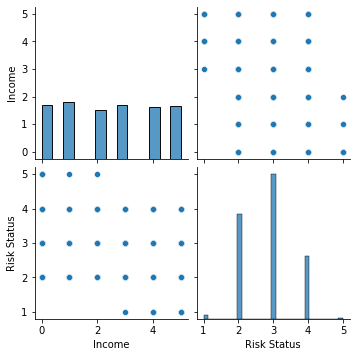

In [ ]:
sns.pairplot(train_df[['Income','Risk Status']])

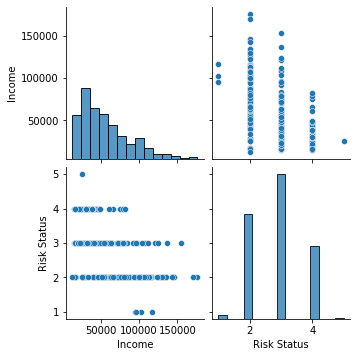

In [ ]:
sns.pairplot(test_sub_df[['Income','Risk Status']])

In [ ]:
normalizer = Normalization(axis = -1)
normalizer.adapt(np.array(train_df).astype('float32'))

In [ ]:
vasin_model = tf.keras.Sequential()
vasin_model.add(normalizer)  #อันนี้ normolize บน tain features ทั้งหมดvasin
vasin_model.add(layers.Dense(64, activation = 'relu'))  #neuron network
vasin_model.add(layers.Dense(32, activation = 'relu'))
vasin_model.add(layers.Dense(1))

In [ ]:
train_features = train_df.copy()

In [ ]:
risk_status = np.array(train_features['Risk Status'])

In [ ]:
#Compile  

vasin_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.3), loss = 'mean_absolute_error',metrics=['accuracy'] )

In [ ]:
#Fit

history = vasin_model.fit(risk_status, X_train, epochs = 100, validation_split = 0.1)

Epoch 1/100
79/79 [==============================] - 1s 4ms/step - loss: 1.2781 - accuracy: 0.4043 - val_loss: 0.8782 - val_accuracy: 0.4104
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.8913 - accuracy: 0.4130 - val_loss: 0.8835 - val_accuracy: 0.4104
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.8889 - accuracy: 0.4130 - val_loss: 0.8898 - val_accuracy: 0.4104
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.8877 - accuracy: 0.4130 - val_loss: 0.8784 - val_accuracy: 0.4104
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.8878 - accuracy: 0.4130 - val_loss: 0.9057 - val_accuracy: 0.4104
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.8882 - accuracy: 0.4130 - val_loss: 0.8877 - val_accuracy: 0.4104
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.8877 - accuracy: 0.4130 - val_loss: 0.8594 - val_accuracy: 0.4104
Epoch 8/100
7

In [ ]:
vasin_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 7)                 15        
_________________________________________________________________
dense_9 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 2,640
Trainable params: 2,625
Non-trainable params: 15
_________________________________________________________________


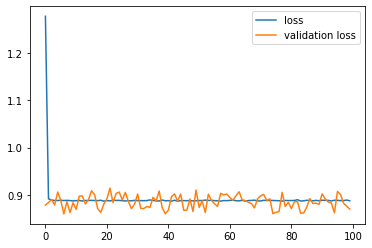

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'validation loss')

plt.legend()
plt.show()

# **Which is the best Model ?**

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
89.30,Random Forest
89.30,Decision Tree
85.31,KNN
81.57,Logistic Regression
80.21,Support Vector Machines
66.67,Naive Bayes
65.70,Stochastic Gradient Decent
64.06,Perceptron


In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Scores: [0.81850534 0.77935943 0.79003559 0.76512456 0.78291815 0.83214286
 0.8        0.77857143 0.79285714 0.78928571]
Mean: 0.7928800203355364
Standard Deviation: 0.01878051808800238


# **Feature Importance**

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Income,0.244
Employment Status,0.207
Education,0.201
Dependents,0.194
Mortgage,0.119
Credit,0.036


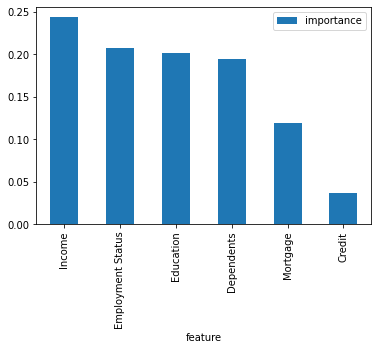

In [ ]:
importances.plot.bar()

# **Further Evaluation**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[  12,   22,    0,    0,    0],
       [  12,  755,  158,    0,    0],
       [   0,  130, 1031,  119,    0],
       [   0,    0,  145,  412,    0],
       [   0,    0,    0,    7,    2]])

# **Precision and Recall**

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions,average='micro'))
print("Recall:",recall_score(Y_train, predictions,average='micro'))

Precision: 0.7885918003565062
Recall: 0.7885918003565062


# **Testing**

In [ ]:
test_df.head(30)

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status,Risk Predicted
0,Male,3,2,1,Married,3,1,Semi-urban,0,NaN,3
1,Male,2,1,2,Widowed,0,1,Urban,1,NaN,3
2,Female,0,3,2,Married,2,1,Urban,0,NaN,4
3,Female,1,3,1,Separated,3,1,Urban,0,NaN,4
4,Male,5,0,1,Single,0,0,Semi-urban,1,NaN,2
5,Male,3,0,1,Widowed,0,1,Semi-urban,0,NaN,2
6,Female,0,2,0,Widowed,1,1,Rural,1,NaN,3
7,Male,1,2,1,Widowed,4,0,Urban,1,NaN,4
8,Male,1,2,1,Single,3,1,Semi-urban,1,NaN,4
9,Male,1,3,1,Separated,5,0,Urban,0,NaN,4


In [ ]:
test_sub_df.drop(['Risk Status'], axis=1)

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit
0,Male,51000,Bachelor,1,Married,Others,Yes,Semi-urban,No
1,Male,48000,Master,2,Widowed,Employed,Yes,Urban,Yes
2,Female,26000,Others,2,Married,Part-time,Yes,Urban,No
3,Female,32000,Others,1,Separated,Others,Yes,Urban,No
4,Male,110000,Doctorate,1,Single,Employed,No,Semi-urban,Yes
...,...,...,...,...,...,...,...,...,...
345,Male,66000,Doctorate,1,Divorced,Self-employed,Yes,Semi-urban,Yes
346,Female,52000,Bachelor,0,Single,Employed,Yes,Urban,Yes
347,Female,23000,Others,0,Single,Others,Yes,Semi-urban,Yes
348,Female,16000,Master,3,Married,Others,Yes,Rural,Yes


In [ ]:
test_sub_df["Risk Status"] = Y_prediction
test_sub_df.to_csv("test_sub.csv", index=False)

In [ ]:
test_sub_df.head(10)

,Gender,Income,Education,Dependents,Marital Status,Employment Status,Mortgage,Resident,Credit,Risk Status
0,Male,51000,Bachelor,1,Married,Others,Yes,Semi-urban,No,3
1,Male,48000,Master,2,Widowed,Employed,Yes,Urban,Yes,3
2,Female,26000,Others,2,Married,Part-time,Yes,Urban,No,4
3,Female,32000,Others,1,Separated,Others,Yes,Urban,No,4
4,Male,110000,Doctorate,1,Single,Employed,No,Semi-urban,Yes,2
5,Male,53000,Doctorate,1,Widowed,Employed,Yes,Semi-urban,No,2
6,Female,19000,Bachelor,0,Widowed,Self-employed,Yes,Rural,Yes,3
7,Male,32000,Bachelor,1,Widowed,Retired,No,Urban,Yes,4
8,Male,34000,Bachelor,1,Single,Others,Yes,Semi-urban,Yes,4
9,Male,31000,Others,1,Separated,Unemployed,No,Urban,No,4
